# Demonstrating lenstronomy's simulation capabilities with lensing by a point mass

In [1]:
# Imports
from itertools import product

import matplotlib.pyplot as plt
import numpy as np

# from lenstronomy.Data.imaging_data import ImageData
# from lenstronomy.ImSim.image_model import ImageModel
# from lenstronomy.Data.psf import PSF
from lenstronomy.Cosmo.micro_lensing import einstein_radius, source_size
from lenstronomy.LensModel.lens_model import LensModel

# from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
# from lenstronomy.Plots import lens_plot
from lenstronomy.LightModel.light_model import LightModel
from lenstronomy.Util import util

In [2]:
def simulate_microlens(
    lens_mass: float,
    source_distance: int,
    source_dia: int = 1,
    lens_distance: int = 4000,
):
    """Simple function to simulate microlens given mass of a lens and the distance of source"""
    # Lensing properties calculations
    theta_E = einstein_radius(lens_mass, lens_distance, source_distance)
    size_s = source_size(source_dia, source_distance)

    # Ray-tracing grid computations
    grid_scale = size_s / 4
    grid_width = theta_E * 4
    num_pix = int(grid_width / grid_scale)
    x, y = util.make_grid(numPix=num_pix, deltapix=grid_scale)

    # Mapping image to source plane
    lens = LensModel(lens_model_list=["POINT_MASS"])
    kwargs_lens = [{"theta_E": theta_E, "center_x": 0, "center_y": 0}]
    beta_x, beta_y = lens.ray_shooting(x, y, kwargs=kwargs_lens)

    light = LightModel(light_model_list=["ELLIPSOID"])
    kwargs_light = [
        {
            "amp": 1,
            "radius": size_s * 5,
            "e1": 0,
            "e2": 0,
            "center_x": 0 + (0.25 * theta_E),
            "center_y": 0,
        }
    ]

    surface_brightness = light.surface_brightness(beta_x, beta_y, kwargs_light)
    image = util.array2image(surface_brightness)
    return image


# Function to simulate multiple lensing images
def multi_simulate(lmasses: list, sdists: list, sdias: list, ldists: list):
    ''' Function to generate parameter combinations and simulate all images '''
    combinations = product(lmasses, sdists, sdias, ldists)
    images = [simulate_microlens(*combination) for combination in list(combinations)]
    return images

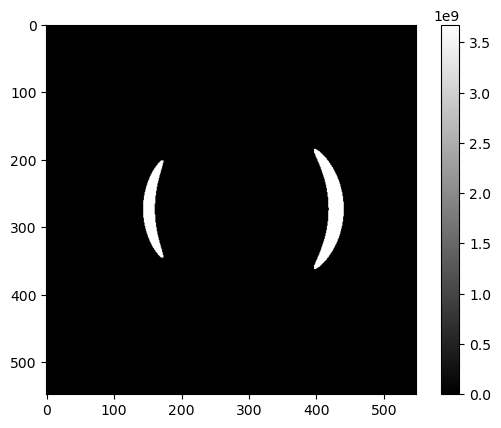

In [3]:
# Simulating a single image
im = simulate_microlens(lens_mass=0.01, source_distance=5000)
ax = plt.imshow(im, cmap="gray")
plt.colorbar()
plt.show()

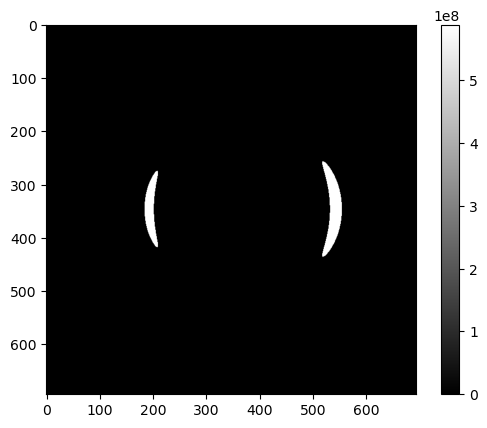

/tmp/ipykernel_23235/2066325926.py:9: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax = plt.imshow(im, cmap="gray")
/tmp/ipykernel_23235/2066325926.py:9: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax = plt.imshow(im, cmap="gray")


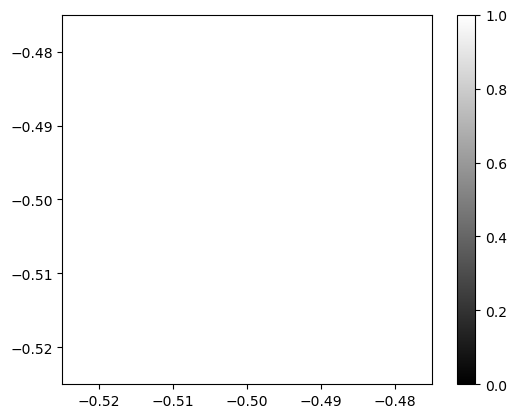

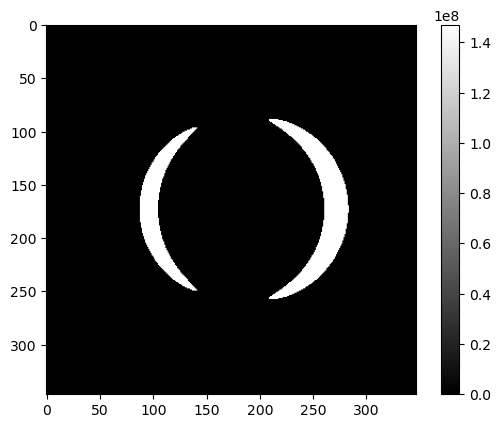

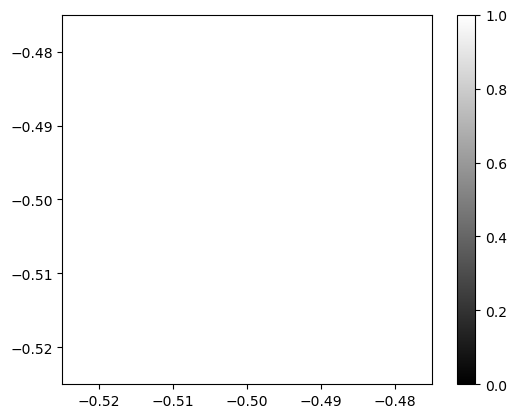

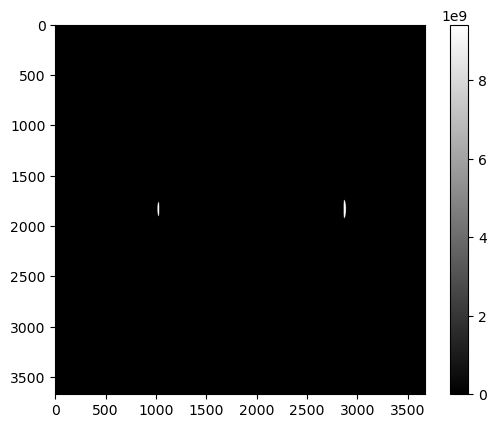

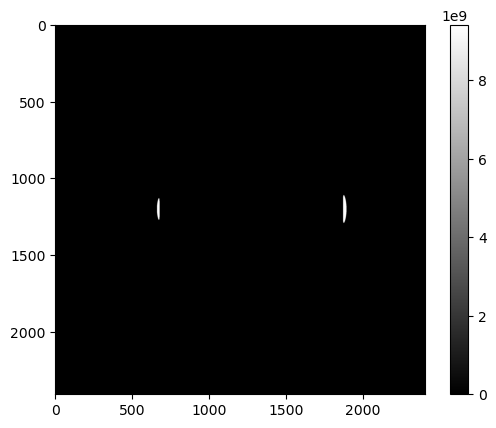

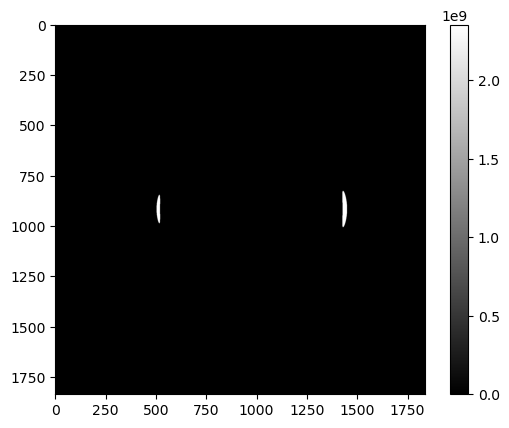

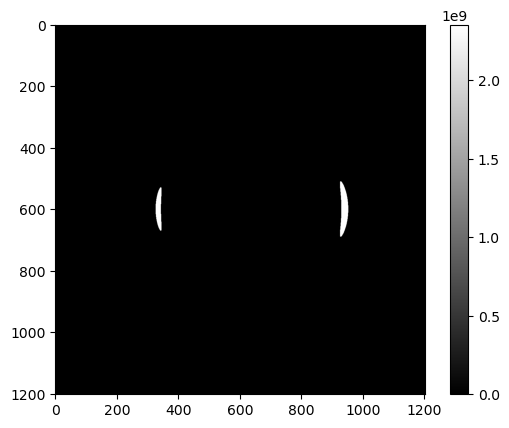

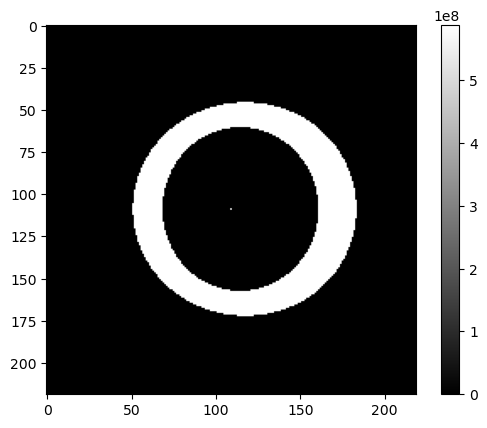

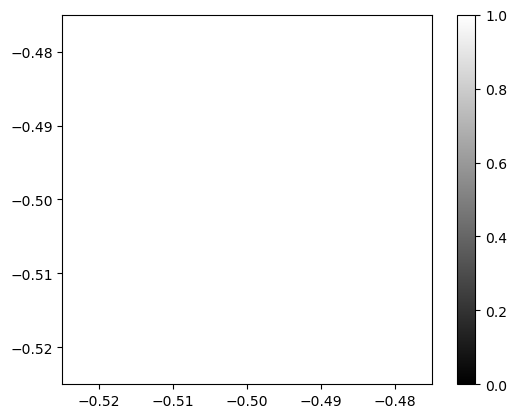

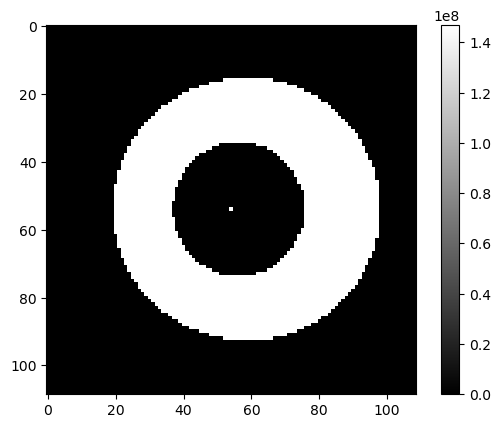

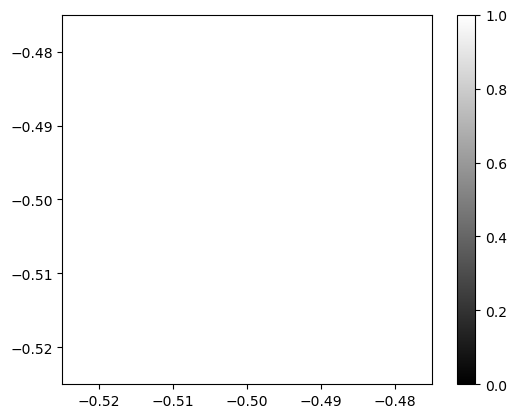

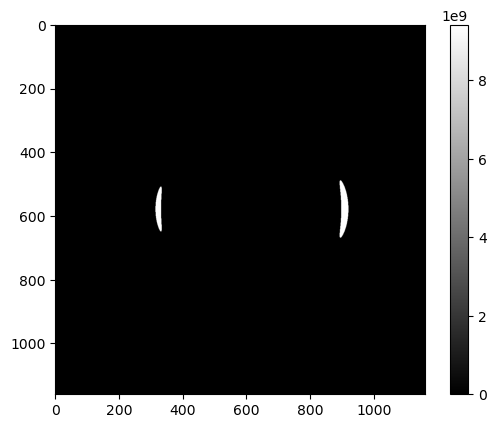

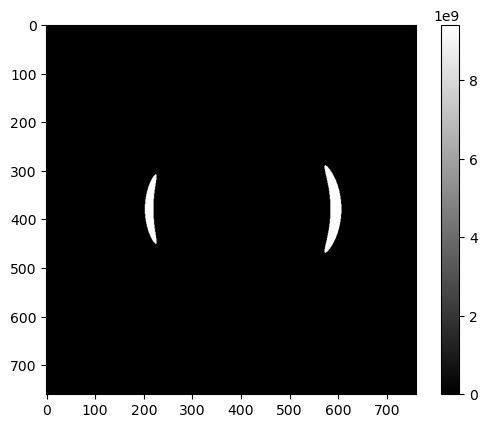

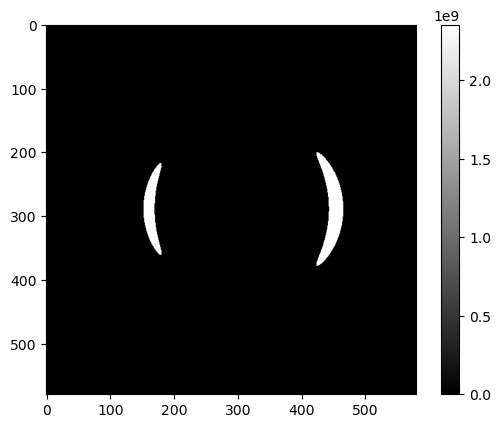

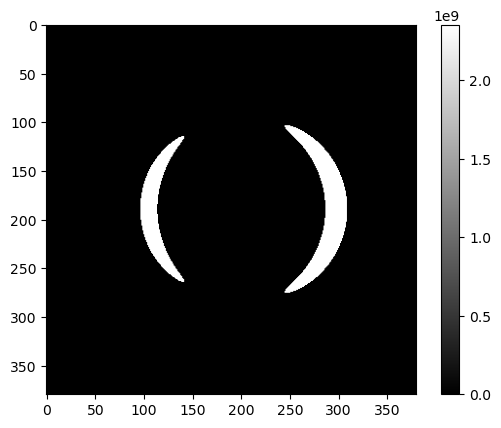

In [4]:
# Simulating multiple images in a go
lmasses = [0.01, 0.001]
sdists = [2000, 8000]
sdias = [1, 2]
ldists = [1000, 2000]
list(product(lmasses, sdists, sdias, ldists))
ims = multi_simulate(lmasses, sdists, sdias, ldists)
for im in ims:
    ax = plt.imshow(im, cmap="gray")
    plt.colorbar()
    plt.show()